### Imporing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time


from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA

In [2]:
#data loading
df = pd.read_csv("creditcard.csv")

### Data exploration and manipulation

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#shuffling of data
df = df.sample(frac=1, axis = 0, random_state = 42)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [5]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 43428 to 121958
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21   

In [7]:
#describe the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.176758e-15,3.384475e-16,-1.399495e-15,2.094652e-15,1.006511e-15,1.495446e-15,-5.633807e-16,1.141630e-16,-2.411994e-15,...,1.616146e-16,-3.510464e-16,2.630603e-16,4.473016e-15,5.146818e-16,1.685202e-15,-3.655912e-16,-1.227702e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
#checking for missing values
pd.DataFrame(df.isnull().sum())

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


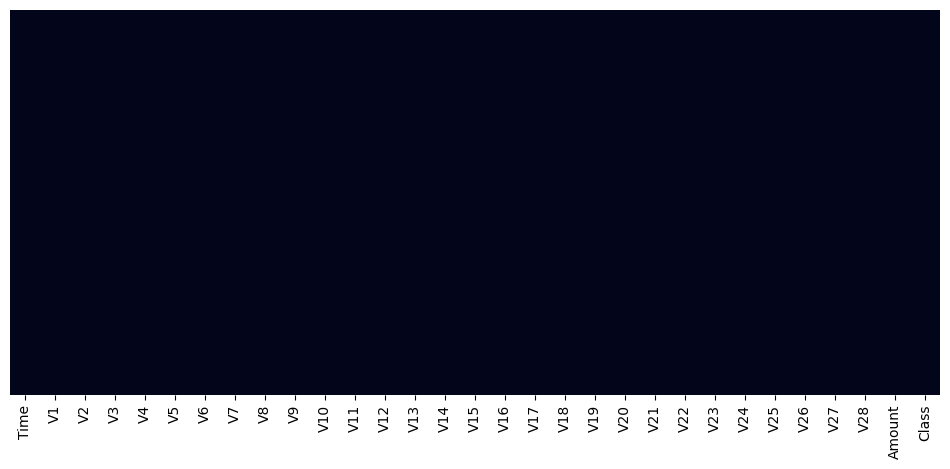

In [9]:
#visualizing missing values
plt.figure(figsize=(12, 5))
sns.heatmap(df.isna(), yticklabels = False, linewidth = 0, cbar = False);

In [30]:
# #looking at the distribution of target variable
# total = df["Class"].value_counts(normalize = False)
# # print(total)

# percent = round(df["Class"].value_counts(normalize = True)*100, 3)
# # print(percent)

# dist_target = pd.concat([total, percent], axis = 1, keys = ["Total", "Percentage (%)"])
# dist_target

pd.DataFrame(df["Class"].value_counts(normalize = True)*100).round(2)

,Class
0,99.83
1,0.17


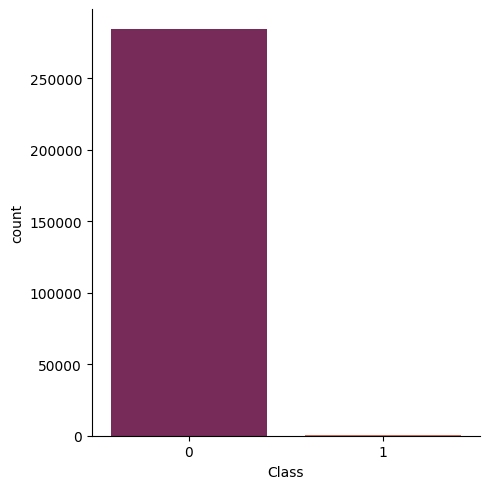

In [11]:
#visualizing the distribution of target variable
# plt.figure(figsize=(5, 4))
sns.catplot(data = df, x = "Class", kind = "count", palette = "rocket");

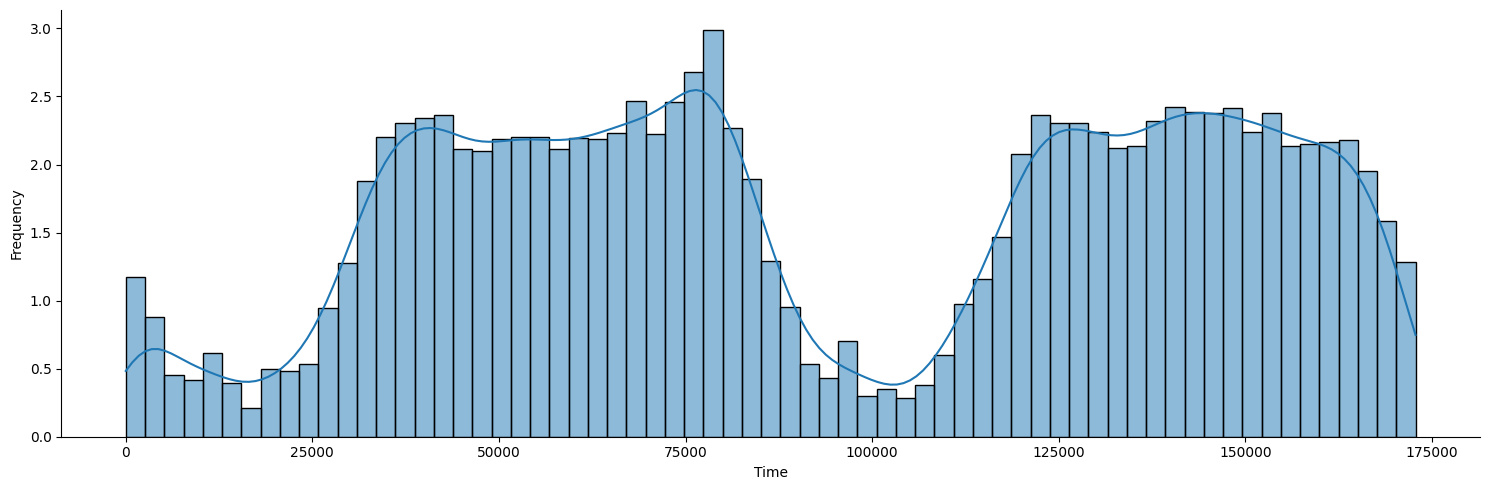

In [12]:
#visualizing distribution of Time variable
sns.displot(data = df, x = "Time", stat = "frequency", kde = True, aspect = 3);

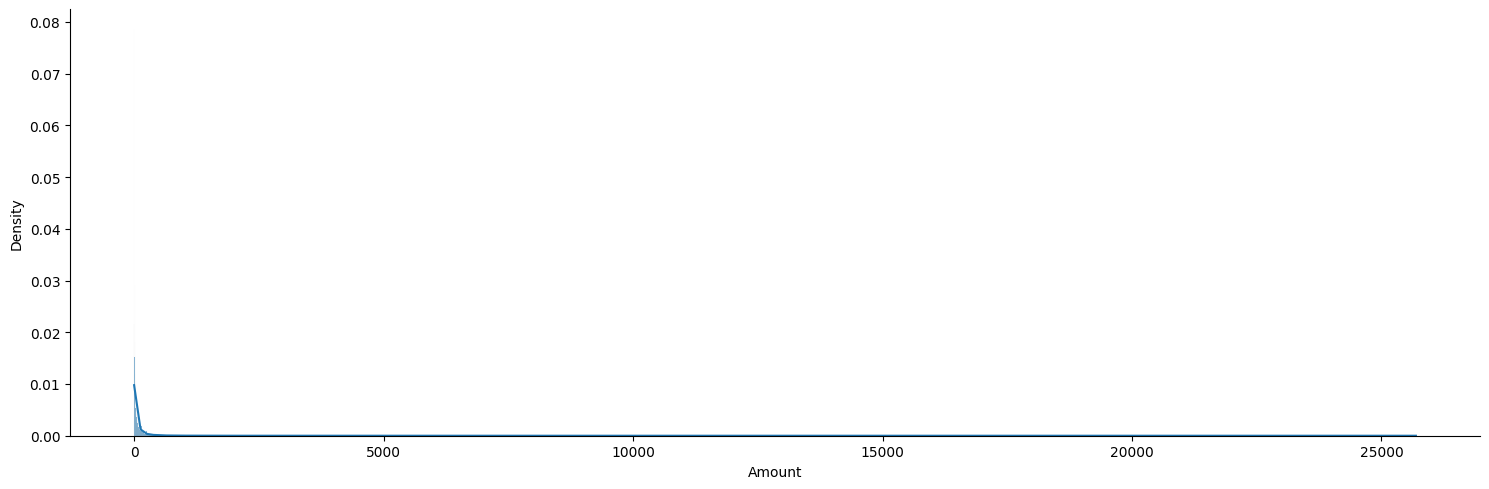

In [13]:
#visualizing distribution of Amount variable
sns.displot(data=df, x = "Amount", stat = "density", kde = True, aspect = 3);

In [14]:
#Scaling Amount and Time as other variables are already scaled
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [15]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1,4.781527,-0.507372
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,0,6.960386,-0.474994
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,0,0.125760,-0.578108
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,0,-0.286453,0.968421
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0,-0.294977,0.984281


In [16]:
amountCol = df.pop("scaled_amount")
df.insert(0, "scaled_amount", amountCol)

timeCol = df.pop("scaled_time")
df.insert(0, "scaled_time", timeCol)

In [17]:
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
43428,-0.507372,4.781527,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1
49906,-0.474994,6.960386,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,0
29474,-0.578108,0.125760,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,0
276481,0.968421,-0.286453,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,0
278846,0.984281,-0.294977,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0


In [27]:
df.shape

(284807, 31)

### Splitting the data

In [28]:
X = df.drop('Class', axis=1)
y = df['Class']

In [29]:
#Crating stratified folds of the data
sss = StratifiedKFold(n_splits=5, random_state = None, shuffle = False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    print('Original_Xtrain Shape: ', original_Xtrain.shape)
    print('Original_Xtest Shape: ', original_Xtest.shape)
    
    original_Xtrain = original_Xtrain.values
    original_Xtest = original_Xtest.values
    original_ytrain = original_ytrain.values
    original_ytest = original_ytest.values
    
    train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
    test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
    # print(train_unique_label, np.around(train_counts_label/len(original_ytrain), decimals=3 ))
    print('-' * 100)

    print('Label Distributions: \n')
    print(np.around((train_counts_label/ len(original_ytrain)*100),  decimals=3))
    print(np.around((test_counts_label/ len(original_ytest)*100),  decimals=3))

Train: [ 56961  56962  56963 ... 284804 284805 284806] Test: [    0     1     2 ... 56959 56960 57389]
Original_Xtrain Shape:  (227845, 30)
Original_Xtest Shape:  (56962, 30)
----------------------------------------------------------------------------------------------------
Label Distributions: 

[99.828  0.172]
[99.826  0.174]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56961  56962  56963 ... 115149 115895 115915]
Original_Xtrain Shape:  (227845, 30)
Original_Xtest Shape:  (56962, 30)
----------------------------------------------------------------------------------------------------
Label Distributions: 

[99.828  0.172]
[99.826  0.174]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113917 113918 113919 ... 174064 175233 176377]
Original_Xtrain Shape:  (227846, 30)
Original_Xtest Shape:  (56961, 30)
----------------------------------------------------------------------------------------------------
Label Distributions: 

[99.827  0.173]
[99.828  0.

In [31]:
X.shape

(284807, 30)

In [32]:
original_Xtrain.shape

(227846, 30)

In [37]:
original_Xtest.shape

(56961, 30)

### Random Undersampling the data

In [38]:
# amount of fraud classes: 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.shape

(984, 31)

In [39]:
pd.DataFrame(new_df['Class'].value_counts())

,Class
0,492
1,492


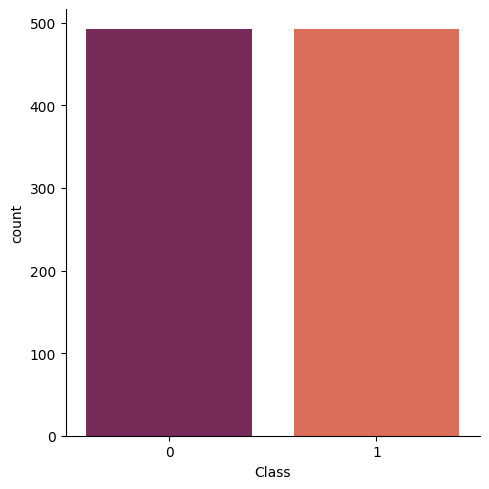

In [40]:
# ax = plt.figure(figsize=(12, 5))
sns.catplot(data = new_df, x = "Class", kind = 'count', palette = "rocket");

In [41]:
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
43428,-0.507372,4.781527,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1
49906,-0.474994,6.960386,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,0
29474,-0.578108,0.125760,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,0
276481,0.968421,-0.286453,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,0
278846,0.984281,-0.294977,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0


### Correlation Analysis on Undersampled and whole data

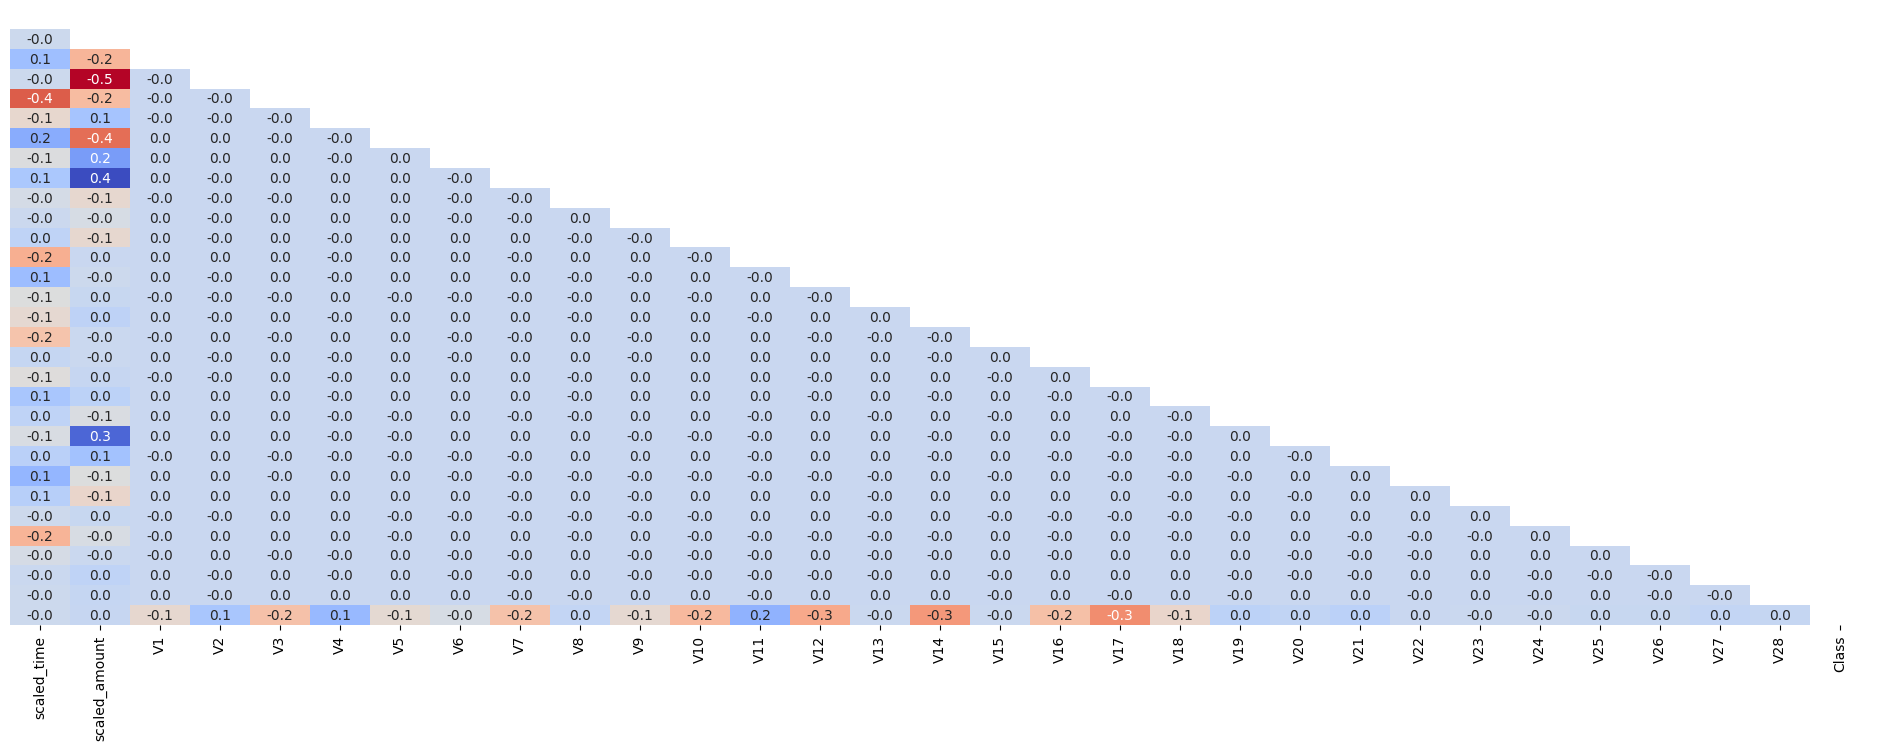

In [42]:
#Correlation analysis for entire dataFrame
corr = df.corr()
fig, ax = plt.subplots(figsize=(24, 8))
matrix = np.triu(corr)
sns.heatmap(corr, annot = True, fmt=".1f", yticklabels= False, cmap='coolwarm_r', cbar = None, mask = matrix);

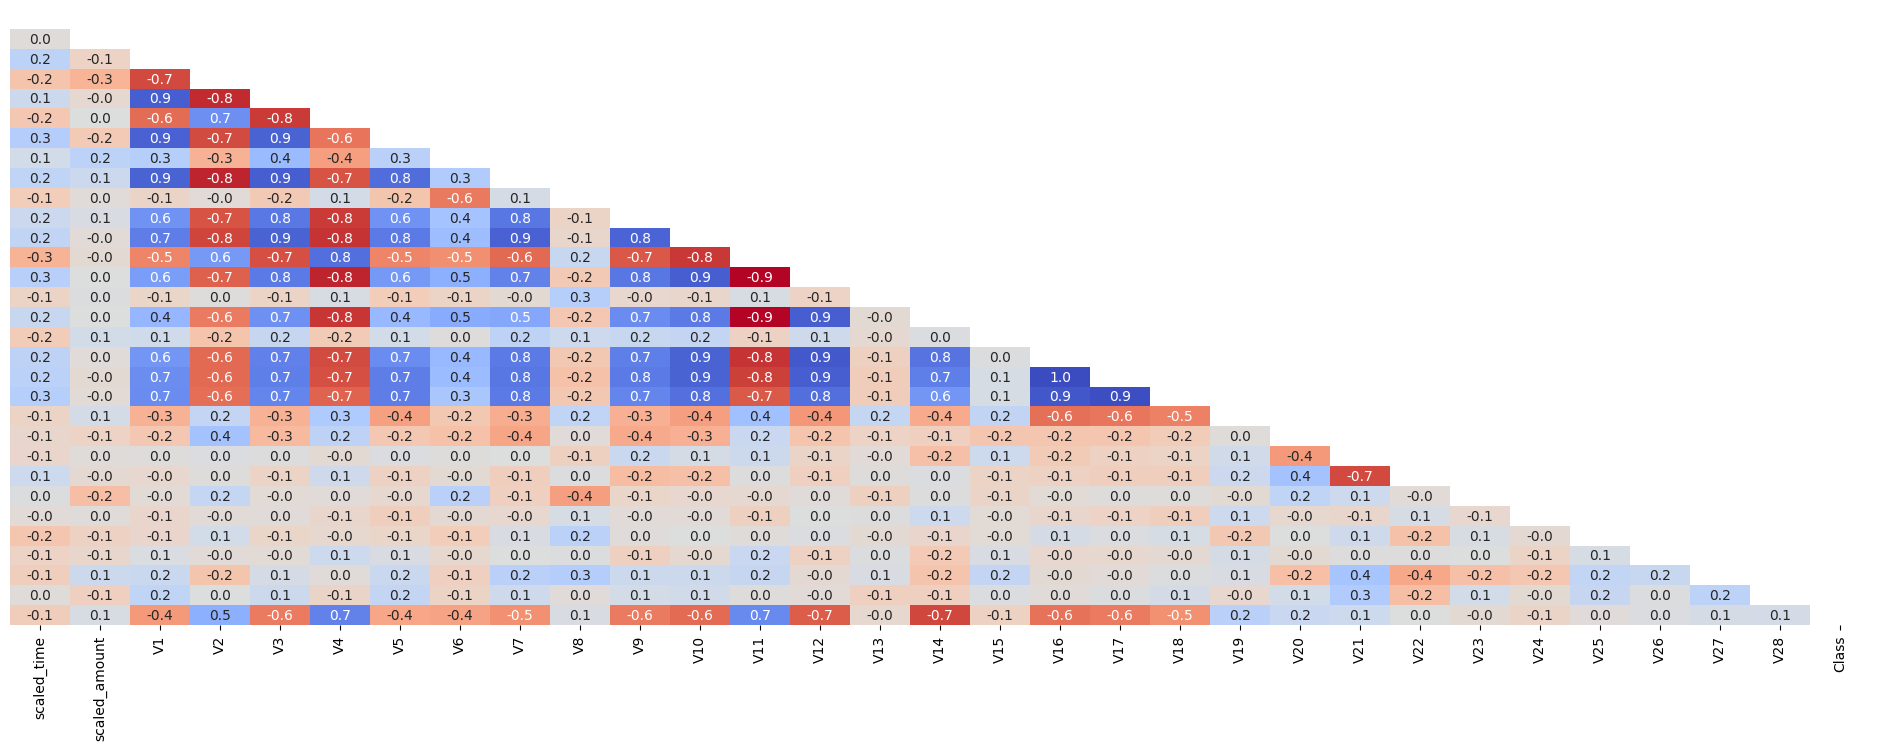

In [43]:
#Correlation analysis for sub-dataFrame
sub_sample_corr = new_df.corr()
fig, ax = plt.subplots(figsize=(24, 8))
matrix = np.triu(corr)
sns.heatmap(sub_sample_corr, annot = True, fmt=".1f", yticklabels= False, cmap='coolwarm_r', mask = matrix, cbar = False);

In [44]:
#finding good positive correlation fetures with Class
newdf_corr = pd.DataFrame(new_df.corr()['Class'])
newdf_corr.loc[(newdf_corr['Class']>0.5) & (newdf_corr['Class']!=1)]

,Class
V4,0.717834
V11,0.683459


In [46]:
#finding good negative correlation fetures with Class
newdf_corr.loc[(newdf_corr['Class']<-0.6)].sort_values(by=['Class'])

,Class
V14,-0.748671
V12,-0.679680
V10,-0.626376


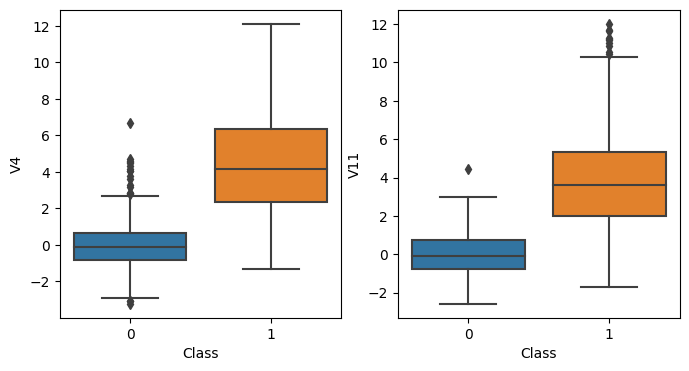

In [47]:
#Visualizing positive correlation features
fig, axes = plt.subplots(1, 2, figsize = (8, 4))
sns.boxplot(ax = axes[0], data=new_df, x = "Class", y = "V4")
sns.boxplot(ax = axes[1], data=new_df, x = "Class", y = "V11");

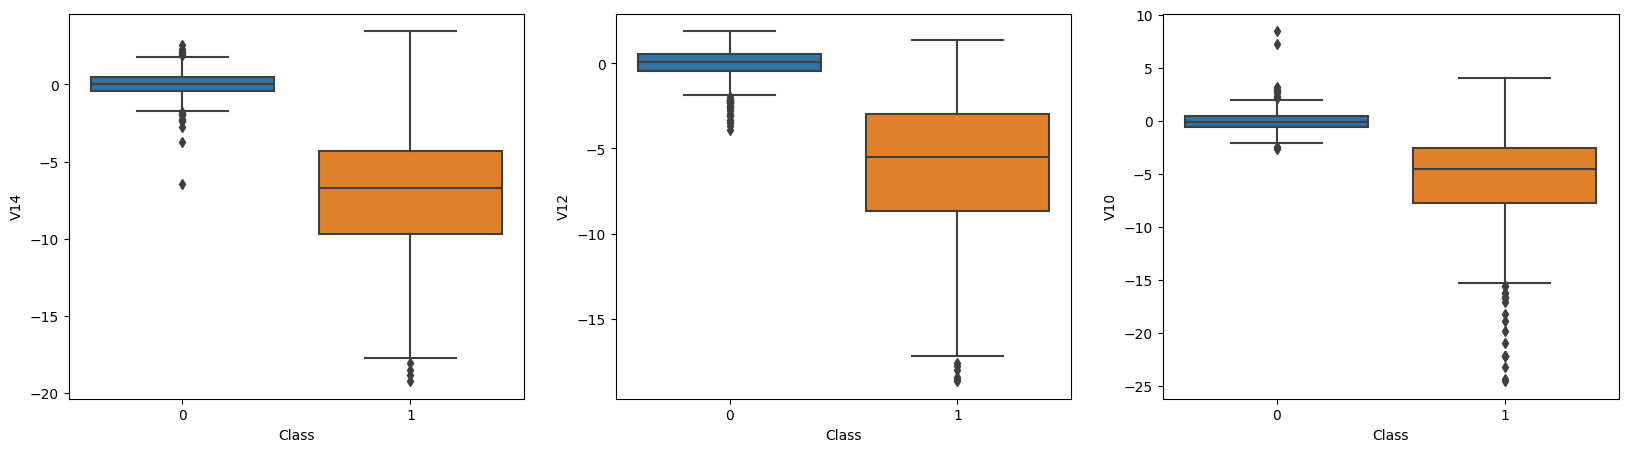

In [48]:
#Visualizing negative correlation features
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
sns.boxplot(ax = axes[0], data=new_df, x = "Class", y = "V14")
sns.boxplot(ax = axes[1], data=new_df, x = "Class", y = "V12")
sns.boxplot(ax = axes[2], data=new_df, x = "Class", y = "V10");

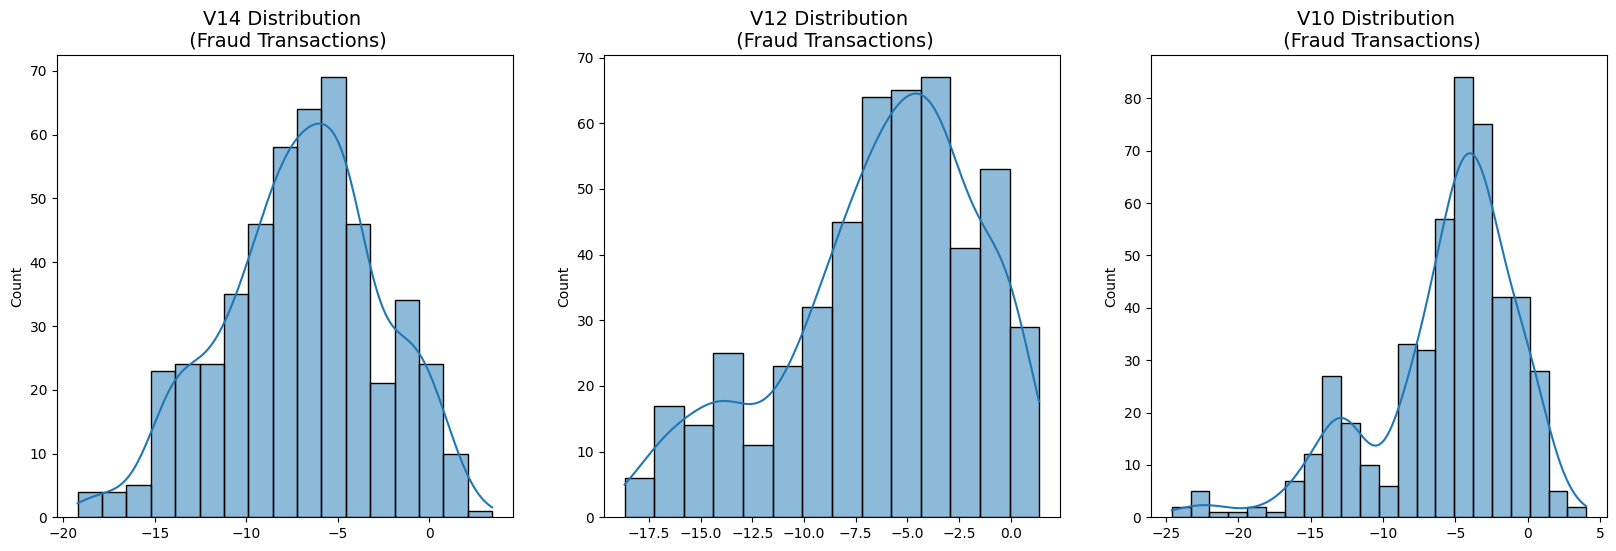

In [49]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.histplot(v14_fraud_dist, ax=ax1, kde = True) #color='#FB8861'
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.histplot(v12_fraud_dist,ax=ax2, kde = True) # color='#56F9BB'
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.histplot(v10_fraud_dist,ax=ax3, kde = True) #color='#C5B3F9'
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

### Outlier Removal

In [50]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 30)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 30)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

print('----' * 30)

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-19.2143254902614, -18.0499976898594, -18.4937733551053, -18.8220867423816]
------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.6837146333443, -18.5536970096458, -18.0475965708216, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-15.5637913387301, -22.1870885620007, -24.4031849699728, -15.2399619587112, -16.3035376590131, -15.5637913387301, -18.9132433348732, -15.1241

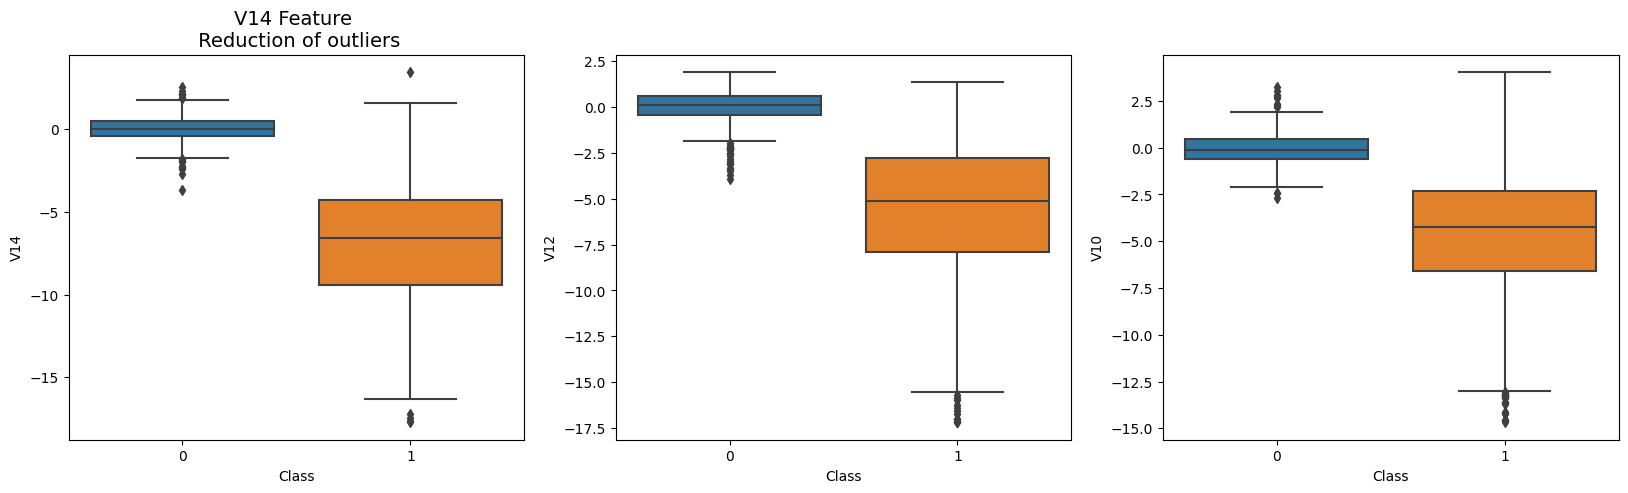

In [51]:
#Visualizing negative correlation features
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
sns.boxplot(ax = axes[0], data=new_df, x = "Class", y = "V14")
axes[0].set_title("V14 Feature \n Reduction of outliers", fontsize=14)

sns.boxplot(ax = axes[1], data=new_df, x = "Class", y = "V12")
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)

sns.boxplot(ax = axes[2], data=new_df, x = "Class", y = "V10")
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14);

### Cluster Analysis of data using PCA, T-SNE etc.

In [52]:
new_df.shape

(947, 31)

In [53]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [54]:
df_vis = pd.DataFrame()

In [55]:
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42, n_jobs = -1, learning_rate='auto',
                      init='random').fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))
print('----' * 30)

#PCA implementation
t0 = time.time()
X_reduced_PCA = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))
print('----' * 30)

#Kernel PCA implementation
t0 = time.time()
X_reduced_KPCA = KernelPCA(n_components=2, kernel='rbf', random_state=42).fit_transform(X.values)
t1 = time.time()
print("KPCA took {:.2} s".format(t1 - t0))
print('----' * 30)

T-SNE took 6.3 s
------------------------------------------------------------------------------------------------------------------------
PCA took 0.01 s
------------------------------------------------------------------------------------------------------------------------
KPCA took 0.077 s
------------------------------------------------------------------------------------------------------------------------


In [56]:
df_vis['y'] = y
df_vis['t_comp1'] = X_reduced_tsne[:, 0]
df_vis['t_comp2'] = X_reduced_tsne[:, 1]

df_vis['PCA_comp1'] = X_reduced_PCA[:, 0]
df_vis['PCA_comp2'] = X_reduced_PCA[:, 1]

df_vis['KPCA_comp1'] = X_reduced_KPCA[:, 0]
df_vis['KPCA_comp2'] = X_reduced_KPCA[:, 1]

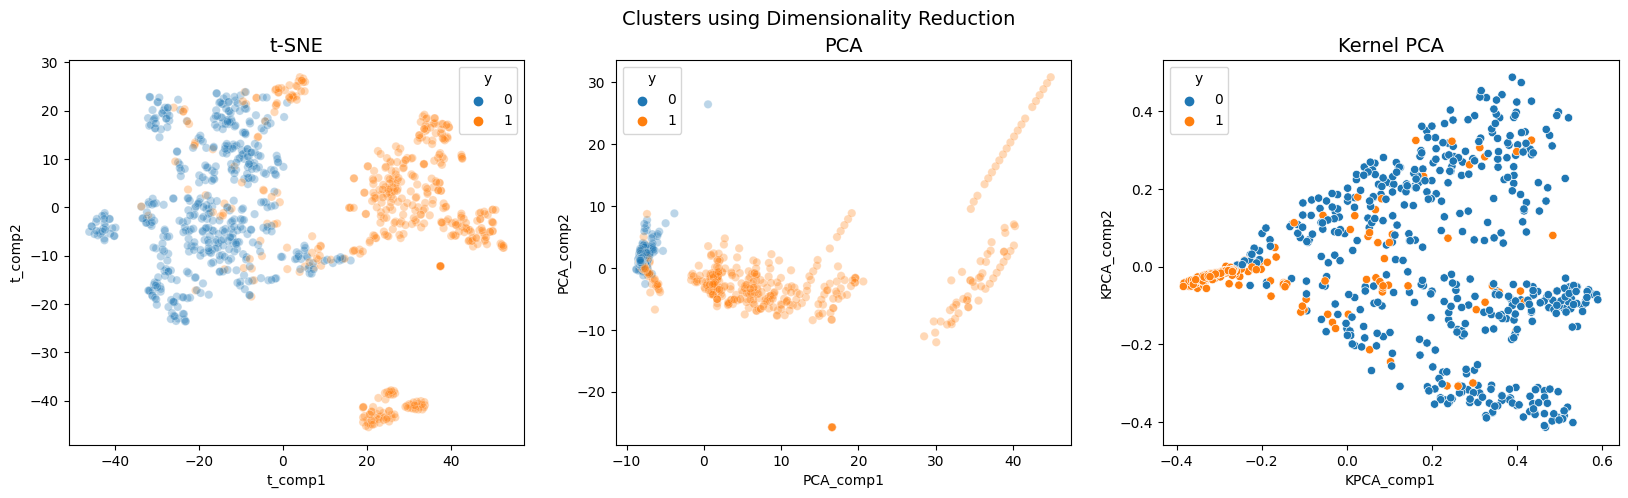

In [57]:
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
fig.suptitle('Clusters using Dimensionality Reduction', fontsize=14)
sns.scatterplot(data = df_vis, x = 't_comp1', y = 't_comp2', hue = 'y', ax = axes[0], alpha = 0.3)
axes[0].set_title('t-SNE', fontsize=14)
sns.scatterplot(data = df_vis, x = 'PCA_comp1', y = 'PCA_comp2', hue = 'y', ax = axes[1], alpha = 0.3)
axes[1].set_title('PCA', fontsize=14)
sns.scatterplot(data = df_vis, x = 'KPCA_comp1', y = 'KPCA_comp2', hue = 'y', ax = axes[2])
axes[2].set_title('Kernel PCA', fontsize=14);

### Model building on randomly undersampled data

In [58]:
X.shape

(947, 30)

In [59]:
from sklearn.model_selection import train_test_split
# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [60]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [61]:
# Let's implement simple classifiers
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [62]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    # classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score


In [63]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} #'solver' : ['liblinear', 'saga' ]
clf = LogisticRegression(max_iter=5000)
grid_log_reg = GridSearchCV(clf, log_reg_params, error_score = 0)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_


In [64]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.46%


In [178]:
from sklearn.metrics import accuracy_score, precision_score

y_pred = log_reg.predict(X_test)

print('Logistic Regression Accuracy Score: ', round(accuracy_score(y_pred, y_test)*100, 2).astype(str) + '%')
print('Logistic Regression Precision Score: ', round(precision_score(y_pred, y_test)*100, 2).astype(str) + '%')

Logistic Regression Accuracy Score:  94.21%
Logistic Regression Precision Score:  91.92%


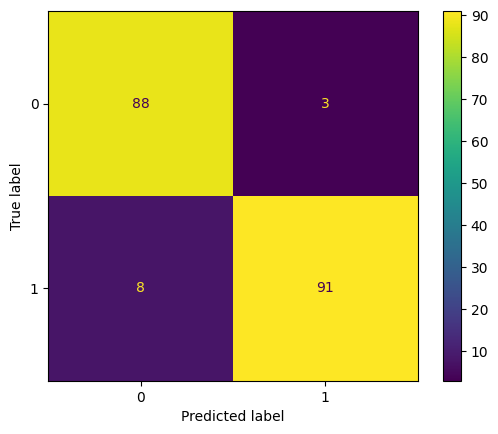

In [177]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, log_reg.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

### Model Building on NearMiss Undersampled data 

In [66]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

In [67]:
undersample_X.shape

(284807, 30)

In [68]:
for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    print('Undersample_Xtrain Shape: ', undersample_Xtrain.shape)
    print('Undersample_Xtest Shape: ', undersample_Xtest.shape)

    undersample_Xtrain = undersample_Xtrain.values
    undersample_Xtest = undersample_Xtest.values
    undersample_ytrain = undersample_ytrain.values
    undersample_ytest = undersample_ytest.values

Train: [ 56961  56962  56963 ... 284804 284805 284806] Test: [    0     1     2 ... 56959 56960 57389]
Undersample_Xtrain Shape:  (227845, 30)
Undersample_Xtest Shape:  (56962, 30)
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56961  56962  56963 ... 115149 115895 115915]
Undersample_Xtrain Shape:  (227845, 30)
Undersample_Xtest Shape:  (56962, 30)
Train: [     0      1      2 ... 284804 284805 284806] Test: [113917 113918 113919 ... 174064 175233 176377]
Undersample_Xtrain Shape:  (227846, 30)
Undersample_Xtest Shape:  (56961, 30)
Train: [     0      1      2 ... 284804 284805 284806] Test: [170875 170876 170877 ... 231615 231641 232419]
Undersample_Xtrain Shape:  (227846, 30)
Undersample_Xtest Shape:  (56961, 30)
Train: [     0      1      2 ... 231615 231641 232419] Test: [227839 227840 227841 ... 284804 284805 284806]
Undersample_Xtrain Shape:  (227846, 30)
Undersample_Xtest Shape:  (56961, 30)


In [82]:
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

In [83]:
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# Implementing NearMiss Technique
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss(sampling_strategy='majority').fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [84]:
undersample_Xtrain.shape

(227846, 30)

In [85]:
undersample_Xtest.shape

(56961, 30)

In [199]:
# Cross Validating the right way
for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg, verbose=True) 
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])

    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtrain[test], undersample_ytrain[test]))
    undersample_precision.append(precision_score(undersample_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytrain[test], undersample_prediction))

[Pipeline] .......... (step 1 of 2) Processing nearmiss, total=   0.5s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   1.8s
(45570, 30)
[Pipeline] .......... (step 1 of 2) Processing nearmiss, total=   0.7s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   0.8s
(45569, 30)
[Pipeline] .......... (step 1 of 2) Processing nearmiss, total=   0.5s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   1.4s
(45569, 30)
[Pipeline] .......... (step 1 of 2) Processing nearmiss, total=   0.6s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   1.3s
(45569, 30)
[Pipeline] .......... (step 1 of 2) Processing nearmiss, total=   0.6s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   1.7s
(45569, 30)


In [198]:
np.array(undersample_f1).mean()

0.006174050521237586

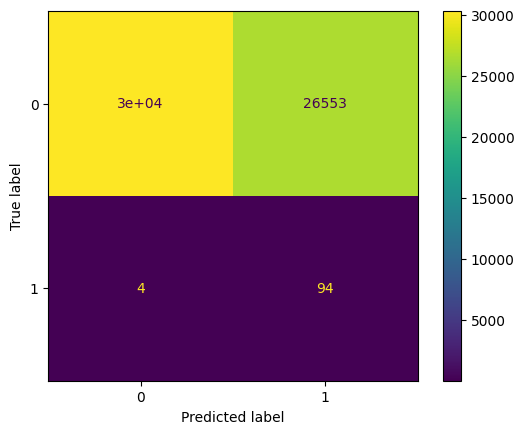

In [180]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(undersample_ytest, log_reg.predict(undersample_Xtest))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [181]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ax = plt.subplots(figsize=(8,6), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    print('Train sizes: ',  train_sizes)
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    
    ax.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax.set_xlabel('Training size (m)')
    ax.set_ylabel('Score')
    ax.grid(True)
    ax.legend(loc="best")
    return plt

In [182]:
X_train.shape

(757, 30)

In [183]:
X_test.shape

(190, 30)

Train sizes:  [ 60 196 332 468 605]


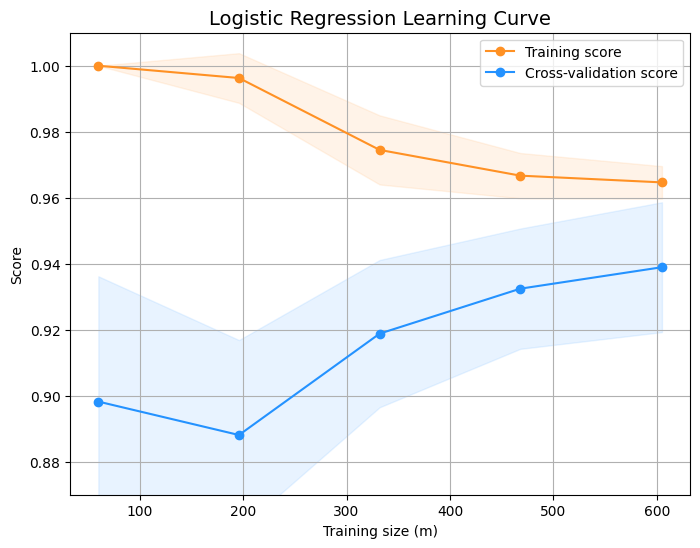

In [191]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=-1);
# plot_learning_curve(log_reg, undersample_Xtrain, undersample_ytrain, (0.87, 1.01), cv=cv, n_jobs=-1)

In [192]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")

In [193]:
log_reg_pred.shape

(757,)

In [194]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', round(roc_auc_score(y_train, log_reg_pred)*100, 2).astype(str)+'%')

Logistic Regression:  96.98%


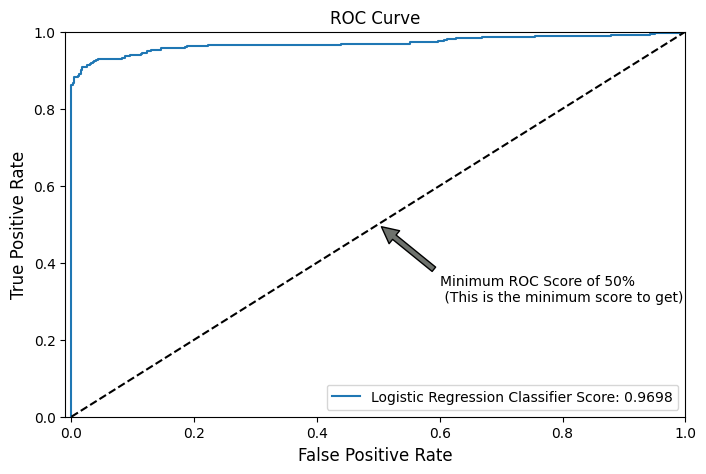

In [95]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr):
    plt.figure(figsize=(8,5))
    plt.title('ROC Curve', fontsize=12)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr)
plt.show()

In [324]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [210]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 30)
print()
print('Overfitting: On randomly undersampled data\n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 30)

# How it should look like
print('---' * 30)
print('How it should be: CV results on original data\n')
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print('---' * 30)

------------------------------------------------------------------------------------------

Overfitting: On randomly undersampled data

Recall Score: 0.94
Precision Score: 0.65
F1 Score: 0.77
Accuracy Score: 0.73
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
How it should be: CV results on original data

Recall Score: 0.95
Precision Score: 0.00
F1 Score: 0.01
Accuracy Score: 0.46
------------------------------------------------------------------------------------------


In [100]:
undersample_y_score = log_reg.decision_function(undersample_Xtest)

In [106]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(undersample_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.01


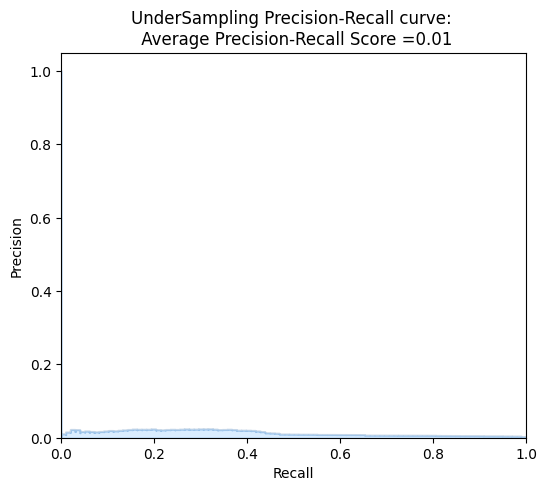

In [213]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,5))

precision, recall, _ = precision_recall_curve(undersample_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=12);

### Oversampling using SMOTE

In [214]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('-'*100)
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))
print('-'*100)
# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

Length of X (train): 227846 | Length of y (train): 227846
----------------------------------------------------------------------------------------------------
Length of X (test): 56961 | Length of y (test): 56961
----------------------------------------------------------------------------------------------------


In [215]:
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(max_iter = 5000), log_reg_params, n_iter=4)

In [216]:
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 30)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 30)

------------------------------------------------------------------------------------------

accuracy: 0.9732011957376075
precision: 0.05552854402817582
recall: 0.9036351833820188
f1: 0.1046082700533213
------------------------------------------------------------------------------------------


In [218]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.99     56863
       Fraud       0.05      0.93      0.10        98

    accuracy                           0.97     56961
   macro avg       0.53      0.95      0.54     56961
weighted avg       1.00      0.97      0.98     56961



In [219]:
y_score = best_est.decision_function(original_Xtest)
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.72


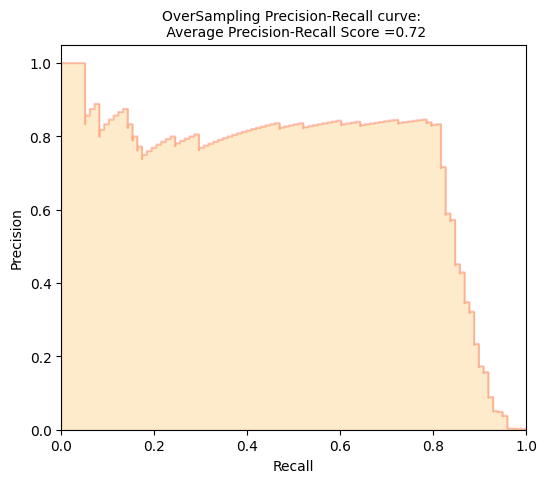

In [221]:
fig = plt.figure(figsize=(6,5))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#F59B00')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
    average_precision), fontsize=10);

### Result comparison between Undersampling and Oversampling

In [230]:
#Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

#Logistic Regression with Under-Sampling
y_pred = log_reg.predict(original_Xtest)
undersample_score = f1_score(original_ytest, y_pred)

#Logistic Regression with SMOTE Technique (Better accuracy with SMOTE)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = f1_score(original_ytest, y_pred_sm)

d = {'Technique': ['Random UnderSampling (NearMiss)', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

final_df

,Technique,Score
0,Random UnderSampling,0.108876
1,Oversampling (SMOTE),0.098538
